___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Judith Alejandra Hinojosa Rábago </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `judith.hinojosa@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png</p>

### <font color= #2E9AFE> Tema: Modelos basados en Árboles Parte II</font>

### Bosques Aleatorios

"Los árboles tienen un sólo aspecto que previene que sean la herramienta ideal para el aprendizaje predictivo, que es la **inexactitud**" 

Pasos para crear un bosque aleatorio:
- Crear un dataset "bootstrapped"
- Crear un árbol de decisión usando el dataset "bootstrapped", pero sólo usar un subconjunto aleatorio de variables (o columnas) en cada paso. 
- Regresar al paso 1. y repetir 

Gracias al proceso de bootstrapping, el requerimento de dividir los datos en prueba y entrenamiento no es tan estricto. Se recomienda dividir los datos en prueba y entrenamiento cuando se quiere comparar su desempeño contra otros modelos. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time

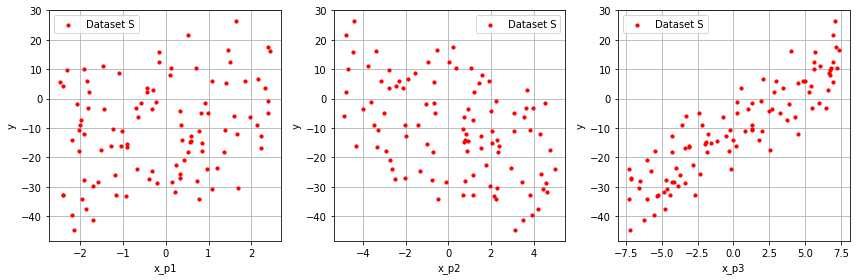

In [4]:
#Generar datos
rng = np.random.RandomState(0)

# #############################################################################
X = np.zeros((100,3))
X[:,0] = 5 * rng.rand(100, 1)[:,0]-2.5
X[:,1] = 10 * rng.rand(100, 1)[:,0]-5
X[:,2] = 15 * rng.rand(100, 1)[:,0]-7.5

y = np.ravel(3*X[:,0]-2*X[:,1]+3*X[:,2]-10)
# Add noise to targets
yrnd = y + 3 * (0.5 - rng.rand(y.shape[0]))


plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X[:,0], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p1')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(132)
plt.scatter(X[:,1], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p2')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(133)
plt.scatter(X[:,2], yrnd, c='r', s=10, label='Dataset S',zorder=2)
plt.xlabel('x_p3')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [5]:
#Separar en train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yrnd, test_size=0.20,
                                                    random_state=0,
                                                    shuffle=True)

--- 0.4058551788330078 seconds ---
R2 = 0.9516


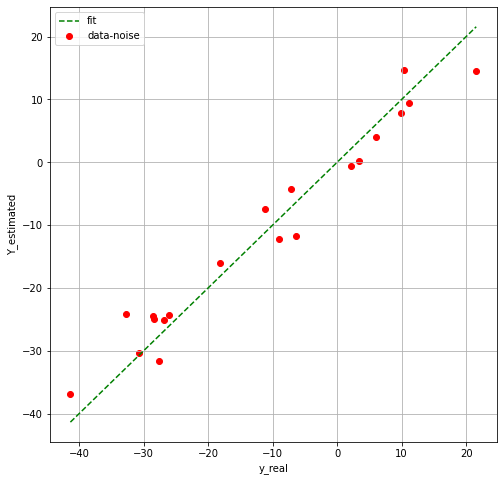

In [6]:
#construir y entrenar el árbol

#construir el modelo
model = RandomForestRegressor(n_estimators=100,#cuántos árboles queremos
                               criterion='squared_error', 
                               max_depth=None, #si dejo None puede el árbol ir a su máxima profundidad -> overfitting
                               min_samples_split=2, #cuántos datos se necesitan para que haga un split
                               min_samples_leaf=1, #cuántos datos dejamos en la última hoja
                               max_features='auto', #de variables que toma
                               bootstrap=True, #¿que haga bootstrapping?
                               oob_score=False, 
                               random_state=0,
                               verbose=0)
#calcular cuánto tarda
start_time = time.time()

#Entrenar el modelo
model = model.fit(X_train,y_train) 
print("--- %s seconds ---" % (time.time() - start_time))

#predecir
Yhat = model.predict(X_test)
print('R2 = %0.4f'%model.score(X_test,y_test))

plt.figure(figsize=(8,8))
plt.scatter(y_test,Yhat,c='r',label='data-noise')
plt.plot(np.linspace(min(y_test),max(y_test),100),np.linspace(min(y_test),max(y_test),100),'g--',label='fit')
plt.xlabel('y_real')
plt.ylabel('Y_estimated')
plt.grid()
plt.legend()
plt.show()

[Text(0.5234704641350211, 0.95, 'X[2] <= 0.215\nsquared_error = 288.592\nsamples = 51\nvalue = -8.471'),
 Text(0.27637130801687765, 0.85, 'X[2] <= -4.344\nsquared_error = 92.597\nsamples = 25\nvalue = -23.744'),
 Text(0.1350210970464135, 0.75, 'X[1] <= -0.312\nsquared_error = 71.765\nsamples = 10\nvalue = -31.559'),
 Text(0.06751054852320675, 0.65, 'X[1] <= -2.673\nsquared_error = 8.496\nsamples = 4\nvalue = -21.022'),
 Text(0.03375527426160337, 0.55, 'X[0] <= 0.635\nsquared_error = 2.158\nsamples = 2\nvalue = -18.836'),
 Text(0.016877637130801686, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = -20.914'),
 Text(0.05063291139240506, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = -17.797'),
 Text(0.10126582278481013, 0.55, 'X[2] <= -6.519\nsquared_error = 0.089\nsamples = 2\nvalue = -24.3'),
 Text(0.08438818565400844, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = -24.002'),
 Text(0.11814345991561181, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = -24.598'),
 Text(0.2025316455696

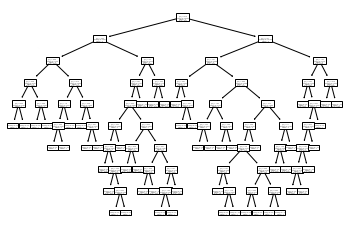

In [7]:
# si yo quisiera ver sólo un árbol
#no se puede imprimir todo el árbol aleatorio
from sklearn import tree
tree.plot_tree(model.estimators_[0]) 

In [8]:
#Buscar un número bueno de árboles a usar de forma visual
ntrees = np.arange(1,100,5)
R2_s = np.zeros(len(ntrees))
for n in range(len(ntrees)):
    model = RandomForestRegressor(n_estimators=ntrees[n],
                               criterion='squared_error',
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
    model = model.fit(X_train,y_train)
    R2_s[n] = model.score(X_train,y_train)

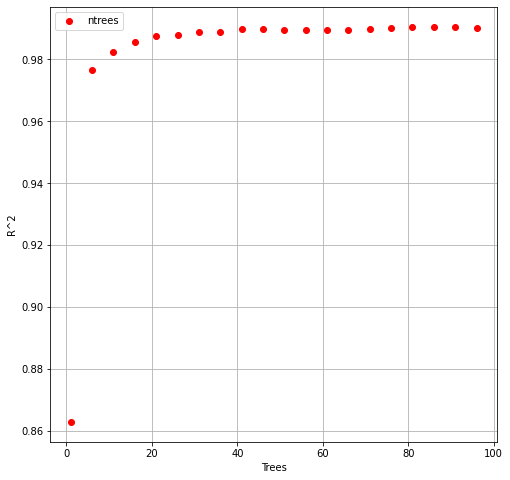

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(ntrees,R2_s,c='r',label='ntrees')
plt.ylabel('R^2')
plt.xlabel('Trees')
plt.grid()
plt.legend()
plt.show()

In [10]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion='squared_error',
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': range(1,100,10)}, 
                  cv=2,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 61}


In [11]:
#crear modelo usando parámetros óptimos
new_model = RandomForestRegressor(n_estimators=61,
                               criterion='squared_error',
                               max_depth=7,
                               min_samples_split=10,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
new_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=10, n_estimators=61,
                      random_state=0)

In [12]:
from sklearn.metrics import r2_score
yhat = new_model.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)

R2: 0.9202848292377214


In [13]:
from sklearn.metrics import mean_squared_error
MSE_score = mean_squared_error(y_test,yhat)
print('MSE:', MSE_score)

MSE: 25.280677135402996


In [14]:
new_model.feature_importances_

array([0.04461806, 0.07544492, 0.87993702])

**Ventajas**

- Son muy buenos generalizando
- Protejen en contra del sobreajuste (overfitting) gracias a la construcción del bootstrapping 
- También reducen la varianza y por lo tanto mejoran la precisión del modelo
- Funcionan muy bien con variables categóricas y variables continuas
- No se requiere escalamiento previo de variables 
- Manejan muy bien el hecho de que haya datos nulos
- Son modelos robustos ante valores atípicos (outliers)
- Son algoritmos muy estables, cuando hay datos nuevos, el algoritmo no se ve muy afectado. Ya que este nuevo dato puede afectar a un árbol individual, pero es difícil que impacte a todos los árboles. 

**Desventajas**

- Complejidad. Los bosques aleatorios crean muchos árboles y combina sus resultados. Requiere mucho poder computacional y recursos 
- Periodos de entrenamiento largos. Requieren más tiempo de entrenamiento. 